# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
### Checking the number of mice.
unique_mice = merge_df["Mouse ID"].unique()
len(unique_mice)

249

In [3]:
### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Determining number of duplicated rows
print(merge_df[["Mouse ID", "Timepoint"]].duplicated().sum())

# Extraction of duplicated rows
merge_df.loc[merge_df[["Mouse ID", "Timepoint"]].duplicated(keep=False),:]

# Can see that g989 has 5 duplicate values in terms of timepoint - interestingly the tumor volume is different for the duplicated rows? Maybe it's showing values of a different mouse?


5


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop(merge_df[merge_df["Mouse ID"] == "g989"].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = cleaned_df["Mouse ID"].unique()
len(unique_mice)

248

## Summary Statistics

In [7]:
### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupby_drug = cleaned_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = groupby_drug["Tumor Volume (mm3)"].mean()
median_tumor_volume = groupby_drug["Tumor Volume (mm3)"].median()
variance_tumor_volume = groupby_drug["Tumor Volume (mm3)"].var()
std_tumor_volume = groupby_drug["Tumor Volume (mm3)"].std()
sem_tumor_volume = groupby_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.concat([mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume],\
axis=1,\
keys=["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev","Tumor Volume Std. Err."])

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate the above table using the aggregate method
agg_tumor_summary = groupby_drug.agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
agg_tumor_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

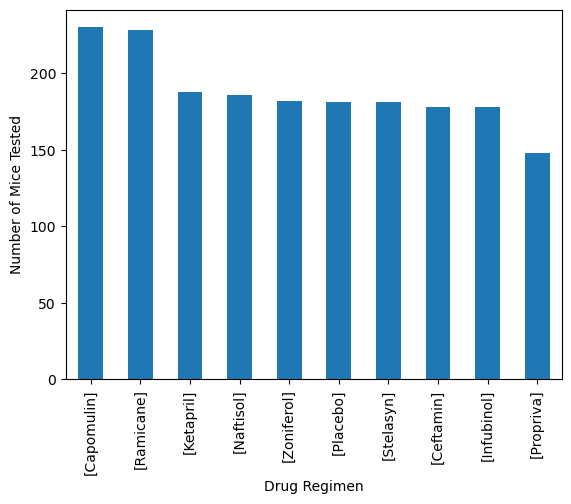

In [9]:
### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create x labels and y values
x_label = list(groupby_drug["Drug Regimen"].unique())
y_values = list(groupby_drug["Drug Regimen"].value_counts())

# Create new dataframe with those lists - pandas only uses dataframes
data = {"Drug Regimen": x_label,
        "Number of Mice Tested":y_values}

drug_regimen_bar = pd.DataFrame(data=data)

# Print bar graph - sort values in descending order first and then plot
drug_regimen_bar.sort_values("Number of Mice Tested", ascending=False).plot.bar(x="Drug Regimen", ylabel="Number of Mice Tested",legend=False)



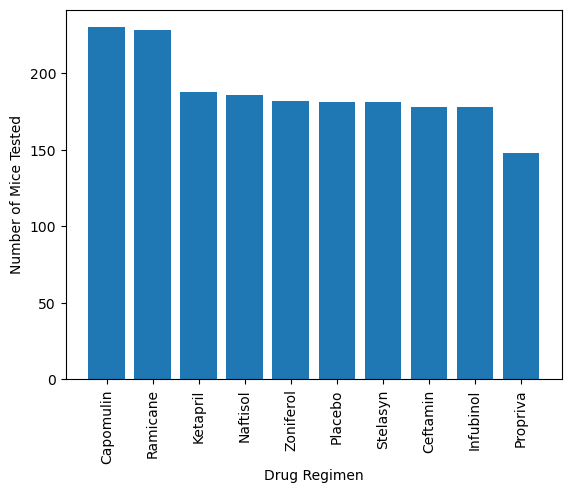

In [10]:
### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Remade list from scratch as previous list counted as numpy array that didn't go into plt well
drug_unique = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
# zipped the names and y-values into a dictionary -> sort values in descending order using lambda function to iterate through all the values in dictionary
dict1 = dict(zip(drug_unique,y_values))
sorted_dict = dict(sorted(dict1.items(), key=lambda x: x[1],reverse=True))

# Create the graph
plt.bar(sorted_dict.keys(),sorted_dict.values())
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(drug_unique,rotation='vertical')
plt.show()

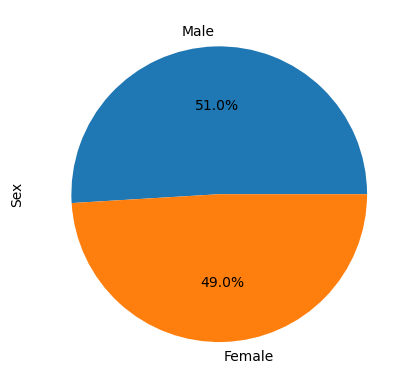

In [11]:
### Generate a pie plot showing the distribution of female versus male mice using Pandas
# Select gender column and gather counts
gender = cleaned_df["Sex"].value_counts()

# Generate plot with percentage formatting
gender.plot.pie(autopct='%1.1f%%')
plt.show()


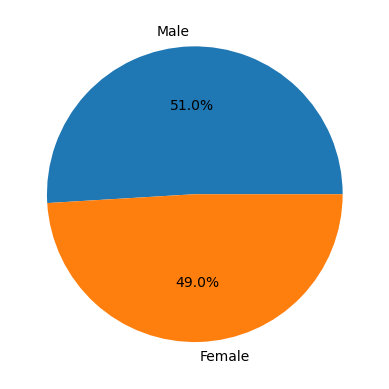

In [12]:
### Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pyplot requires list formatting - extract the 'gender' series from previous answer into list 
labels = gender.index.tolist()
values = gender.values.tolist()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
### Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Create dataframe of just those four drugs regimens
cleaned_df_specific = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")|(cleaned_df["Drug Regimen"] == "Ramicane")| \
                                    (cleaned_df["Drug Regimen"] == "Infubinol")|(cleaned_df["Drug Regimen"] == "Ceftamin")]

# Can get the last timepoint by sorting values of timepoint (to have it in ascending order) -> drop duplicate of mouse id and keeping last value = the last timepoint

cleaned_df_specific = cleaned_df_specific.sort_values(["Mouse ID","Timepoint"])
cleaned_df_specific = cleaned_df_specific.drop_duplicates(["Mouse ID"], keep='last')

# Put back into order of drug regimen
cleaned_df_specific = cleaned_df_specific.sort_values(["Drug Regimen"])

# Can see it's all the max/last timepoints of each mouse per drug regimen
cleaned_df_specific.head(10)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1844,l897,45,38.846876,1,Capomulin,Male,17,19
1764,j119,45,38.125164,1,Capomulin,Female,7,23
1680,j246,35,38.753265,1,Capomulin,Female,21,21
1754,u364,45,31.023923,3,Capomulin,Male,18,17
1824,g316,45,40.159220,2,Capomulin,Female,22,22
1834,g288,45,37.074024,1,Capomulin,Male,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1740,s710,45,40.728578,1,Capomulin,Female,1,23
1774,v923,45,40.658124,2,Capomulin,Female,19,21


In [14]:
# Create empty dictionary of lists for each treatment
tumor_data = {"Capomulin":[], "Ramicane":[], "Infubinol":[],"Ceftamin":[]}

# Grab tumor volume per mouse for each treatment type - iterate each row in tumor volume -> add the values of tumor volume into their respective keys in dictionary
for index, row in cleaned_df_specific.iterrows():
    key = row["Drug Regimen"]
    value = row["Tumor Volume (mm3)"]
    tumor_data[key].append(value)


# Calculate the IQR and quantitatively determine if there are any potential outliers - 
tumor_df = pd.DataFrame(tumor_data)
tumor_upper = tumor_df.quantile(0.75)
tumor_lower = tumor_df.quantile(0.25)
tumor_iqr = tumor_upper - tumor_lower

# Determining upper and lower bound for outliers
tumor_lowerbound = tumor_lower - (1.5*tumor_iqr)
tumor_upperbound = tumor_upper + (1.5*tumor_iqr)

# Print out outlier values for each drug regimen
print(f"Values above these following values could be outliers:\n\
{tumor_upperbound}")
print(f"fValues below these following values could be outliers:\n\
{tumor_lowerbound}")

# Creating a for loop over the dictionary of lists - all outliers will be noted - .loc used since the tumor_lowerbound/upperbound variables is techincally a Pandas series
for key, values in tumor_data.items():
    for value in values:
        if value < tumor_lowerbound.loc[key]:
            print(f"Potential Outliers (lower-bound): {key} {value}")
        elif value > tumor_upperbound.loc[key]:
            print(f"Potential Outliers (upper-bound): {key} {value}")
    
    

Values above these following values could be outliers:
Capomulin    51.832015
Ramicane     54.306811
Infubinol    82.741446
Ceftamin     87.666458
dtype: float64
fValues below these following values could be outliers:
Capomulin    20.704562
Ramicane     17.912664
Infubinol    36.832905
Ceftamin     25.355450
dtype: float64
Potential Outliers (lower-bound): Infubinol 36.3213458


Text(0, 0.5, 'Final Tumor Volume (mm3)')

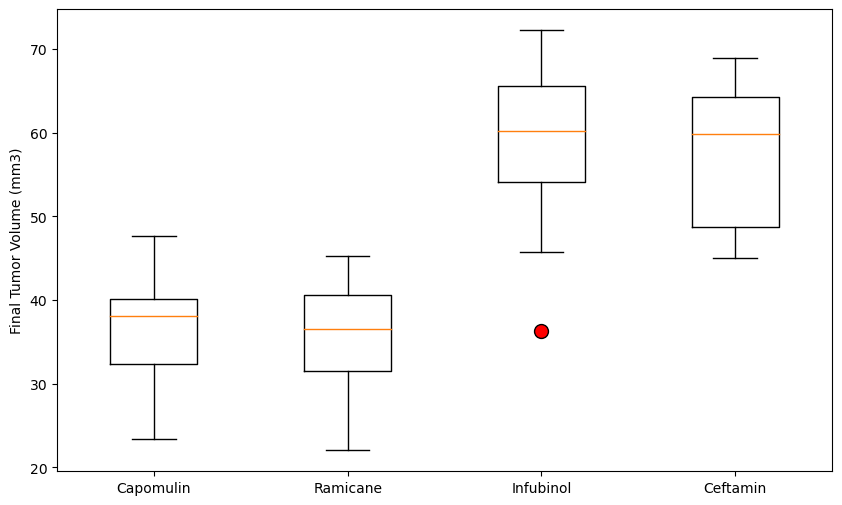

In [15]:
### Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Label from the keys in the previous dictionary
labels = list(tumor_data.keys())

# Create boxplot - red circle marker for outliers
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.boxplot(tumor_df,labels=labels,flierprops={'markersize':10, 'markerfacecolor':'red'})
ax1.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of m601 - Tumor Volume across 45 days')

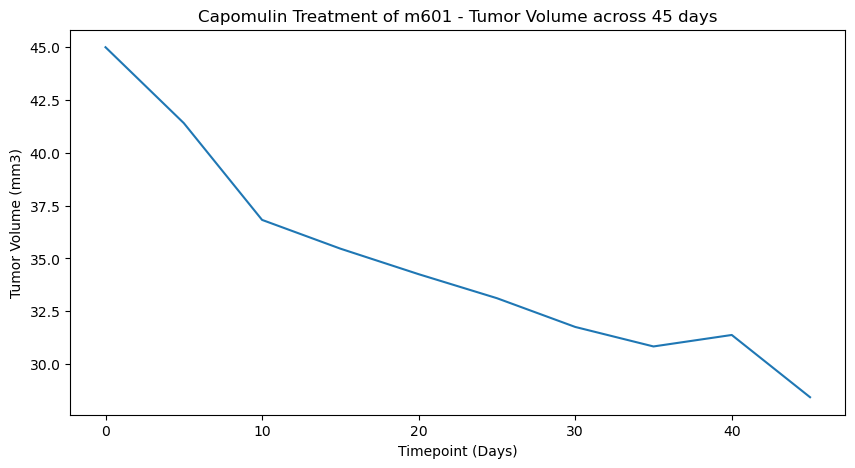

In [16]:
### Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create new dataframe that filters only Capomulin-treated mice
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

# Looking at the mice name, let's do m601
mice_m601 = capomulin_df.loc[cleaned_df["Mouse ID"] =="m601"]

# Data for x and y axis
x = mice_m601["Timepoint"]
y = mice_m601["Tumor Volume (mm3)"]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,y)
ax.set_xlabel("Timepoint (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Capomulin Treatment of m601 - Tumor Volume across 45 days")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

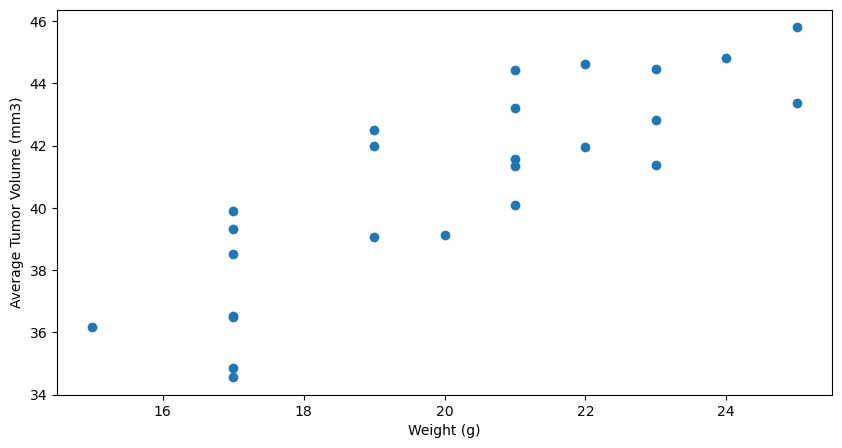

In [17]:
### Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Creating two separate dataframes with weight + average tumor weight in each - can't seem to fuse them into one dataframe
weight_capomulin = capomulin_df.groupby("Mouse ID")["Weight (g)"].first().reset_index()
tumor_capomulin = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Getting data from each dataframe + plotting scatterplot
x = weight_capomulin["Weight (g)"]
y = tumor_capomulin["Tumor Volume (mm3)"]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

Correlation between weight and average tumor volume for the Capomulin regimen is 0.8419363424694721, with a p-value of 1.3225722434712404e-07


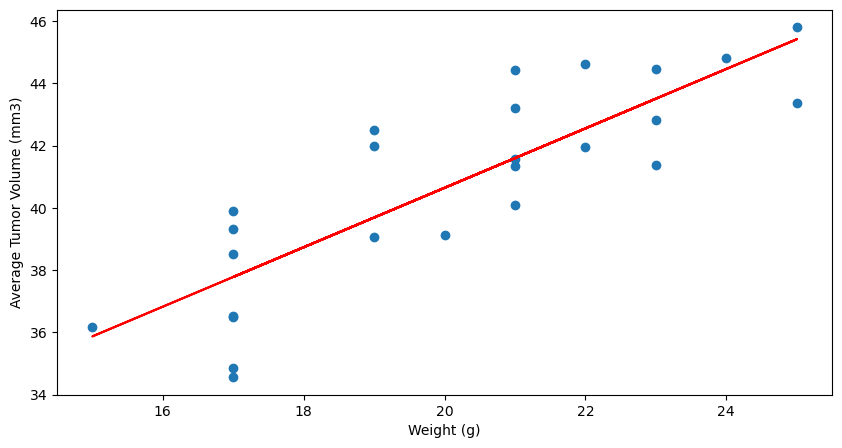

In [18]:
### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Calculating coefficients for regression
capomulin_slope, capomulin_int, capomulin_r, capomulin_p, capomulin_std_err = st.linregress(x,y)
capomulin_fit = capomulin_slope * x + capomulin_int

# Overlaying the regression fit line with the scatterplot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.plot(x,capomulin_fit,color='r')
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")

# Reporting correlation coefficient + p-value
print(f"Correlation between weight and average tumor volume for the Capomulin regimen is {capomulin_r}, with a p-value of {capomulin_p}")
